Basic Exploratory Data Analysis (EDA) performed following the google guide for Exploratory Data Analysis for Feature Selection in Machine Learning that can be found in: https://services.google.com/fh/files/misc/exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## Import Data 

In [4]:
data = pd.read_csv('/content/books.csv',on_bad_lines='skip')
data.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


# 2. Statistical data analysis

##2.1 Descriptive analysis (univariate analysis)
Descriptive analysis (or univariate analysis) provides an understanding of the characteristics
of each attribute of the dataset. It also offers important evidence for feature selection in a
later state

In [5]:
#Checking Data Types
data.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [6]:
# Checking Missing Values
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Numerical Data

In [7]:
#Quantile/Descriptive statistics of numerical columns
data.describe()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


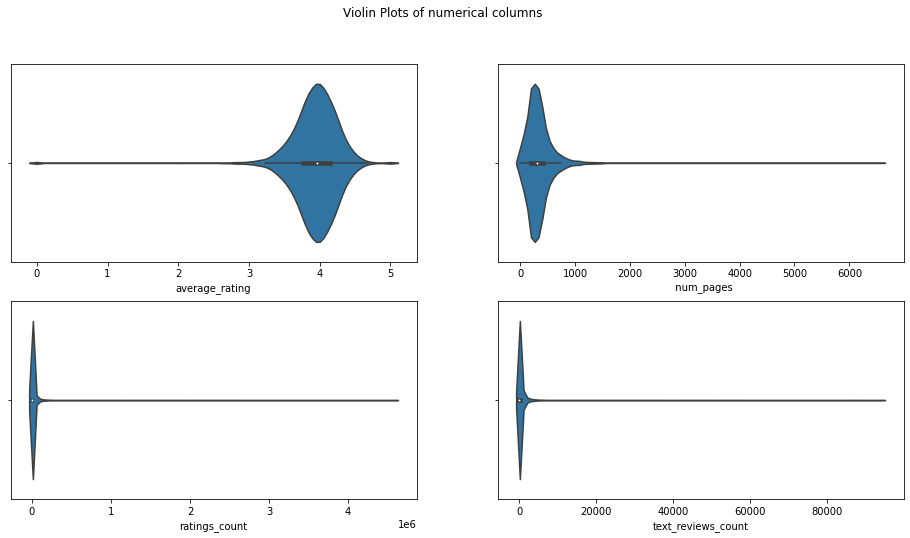

In [8]:
#Distribution histogram
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(16,8))
fig.suptitle('Violin Plots of numerical columns')
sns.violinplot(ax=axes[0,0],data = data, x="average_rating")
sns.violinplot(ax=axes[0,1],data = data,x="  num_pages")
sns.violinplot(ax=axes[1,0],data = data,x="ratings_count")
sns.violinplot(ax=axes[1,1],data = data,x="text_reviews_count")


In [9]:
#Book with most text reviews
data[data['text_reviews_count']==data['text_reviews_count'].max()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company


Categorical Data

In [10]:
#Cardinality / Unique Counts

aux = data['language_code'].value_counts().reset_index()
aux['percent_of_total'] = aux['language_code'] / aux['language_code'].sum()

aux

,index,language_code,percent_of_total
0,eng,8908,0.800863
1,en-US,1408,0.126585
2,spa,218,0.019599
3,en-GB,214,0.019239
4,fre,144,0.012946
5,ger,99,0.008900
6,jpn,46,0.004136
7,mul,19,0.001708
8,zho,14,0.001259
9,grc,11,0.000989


In [11]:
#Checking date types

aux = data['publication_date'].reset_index()

aux['publication_date'] = pd.to_datetime(aux['publication_date'], format = '%m/%d/%Y',  errors='coerce')

aux.dtypes

index                        int64
publication_date    datetime64[ns]
dtype: object

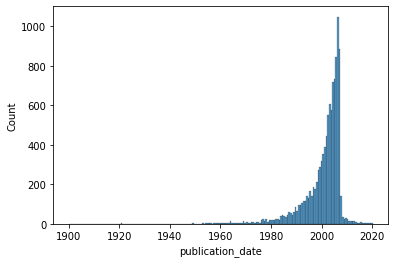

In [12]:
sns.histplot(
    aux,
    x="publication_date"
)

##2.2 Bivariate Analysis

Correlation Analysis

In [13]:
#Qualitative Analysis

#Contingency Tables


In [14]:
#Quantitative Analasys

data.corr()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.036207,-0.002185,-0.026134,-0.076820,-0.081289
average_rating,-0.036207,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.002185,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,-0.026134,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,-0.076820,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,-0.081289,0.033663,0.008152,0.036977,0.865977,1.000000
